<a href="https://colab.research.google.com/github/wjh818/Data_hwj/blob/main/Machine_Learning/5_%EA%B5%AC%EA%B0%84%EB%B6%84%ED%95%A0%EA%B3%BC_%EB%8B%A4%ED%95%AD%EC%8B%9D_%EC%B6%94%EA%B0%80_%EA%B8%B0%EB%B2%95.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install mglearn

     |████████████████████████████████| 542kB 8.8MB/s 
  Created wheel for mglearn: filename=mglearn-0.1.9-py2.py3-none-any.whl size=582638 sha256=ff26a033e3f4e694f728637e208cf477dbf09931704b22fc6e7c2357a8fa561b
  Stored in directory: /root/.cache/pip/wheels/eb/a6/ea/a6a3716233fa62fc561259b5cb1e28f79e9ff3592c0adac5f0
Successfully built mglearn


In [2]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
import mglearn

import matplotlib.pyplot as plt
import numpy as np

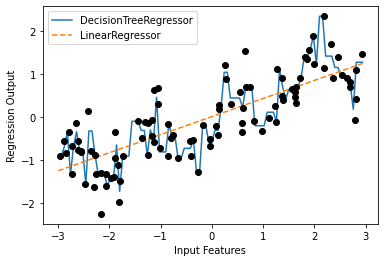

In [3]:
X, y = mglearn.datasets.make_wave(n_samples=100)
line = np.linspace(-3, 3, 100, endpoint=False).reshape(-1, 1)

reg = DecisionTreeRegressor(min_samples_split=3).fit(X, y)
plt.plot(line, reg.predict(line), label="DecisionTreeRegressor")

reg = LinearRegression().fit(X, y)
plt.plot(line, reg.predict(line), '--', label="LinearRegressor")

plt.plot(X[:, 0], y, 'o', c='k')
plt.ylabel("Regression Output")
plt.xlabel("Input Features")
plt.legend(loc="best")
plt.show()

## 구간 분할(bining)이란
모든 데이터를 한번에 훈련하고 예측하는 것이 아닌, 구간을 만들고, 구간에 대한 정보를 추가해 주는 것

In [4]:
# 구간 데이터 만들기
bins = np.linspace(-3, 3, 11)
print("구간 정보 : {}".format(bins))

구간 정보 : [-3.  -2.4 -1.8 -1.2 -0.6  0.   0.6  1.2  1.8  2.4  3. ]


In [5]:
which_bin = np.digitize(X, bins=bins)
print('\n데이터 포인트:\n', X[:5])
print('\n데이터 포인트의 소속구간:\n', which_bin[:5])


데이터 포인트:
 [[-0.75275929]
 [ 2.70428584]
 [ 1.39196365]
 [ 0.59195091]
 [-2.06388816]]

데이터 포인트의 소속구간:
 [[ 4]
 [10]
 [ 8]
 [ 6]
 [ 2]]


In [6]:
from sklearn.preprocessing import OneHotEncoder

#OneHotEncoder를 사용
encoder = OneHotEncoder(sparse=False) # 희소행렬 형태로 나타내지 않음(각 아이템의 위치값을 나타내지 않음)

#encoder.fit은 which_bin에 나타낸 유일한 값을 찾습니다.
encoder.fit(which_bin)

#One-hot-encoding으로 변환
X_binned = encoder.transform(which_bin)
print(X_binned[:5])

[[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]


In [7]:
print("X_binned.shape: {}".format(X_binned.shape))

X_binned.shape: (100, 10)


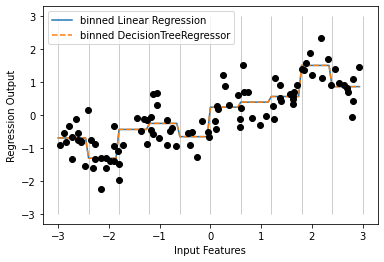

In [8]:
line_binned = encoder.transform(np.digitize(line, bins=bins))

reg = LinearRegression().fit(X_binned, y) # 소속 구간에 들어있는 타겟 y를 훈련시킴
plt.plot(line, reg.predict(line_binned), label='binned Linear Regression')

reg = DecisionTreeRegressor(min_samples_split=3).fit(X_binned, y)
plt.plot(line, reg.predict(line_binned), '--', label='binned DecisionTreeRegressor')

plt.plot(X[:, 0], y, 'o', c='k')

# 구간 데이터 수직선 그리기
plt.vlines(bins, -3, 3, linewidth=1, alpha=.2)
plt.legend(loc='best')
plt.ylabel('Regression Output')
plt.xlabel('Input Features')
plt.show()

위 수평선이 의미하는 바는 각 구간의 y 평균

In [9]:
# 상호작용과 다항식
X_combined = np.hstack([X, X_binned]) # 전체 데이터와 구간 데이터를 합침
X_combined.shape

(100, 11)

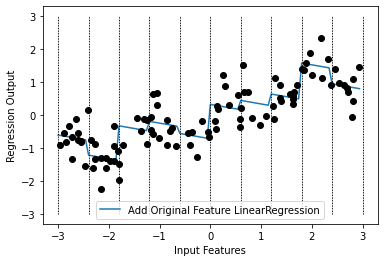

In [10]:
reg = LinearRegression().fit(X_combined, y)

line_combined = np.hstack([line, line_binned])
plt.plot(line, reg.predict(line_combined), label='Add Original Feature LinearRegression')

for bin in bins:
    plt.plot([bin, bin], [-3, 3], ':', c='k', linewidth=1)

plt.vlines(bins, -3, 3, linewidth=1, alpha=.2)
plt.legend(loc='best')
plt.ylabel('Regression Output')
plt.xlabel('Input Features')
plt.plot(X[:, 0], y, 'o', c='k')
plt.show()

In [11]:
# 상호작용 데이터를 추가하면 어떻게 될까?
X_product = np.hstack([X_binned, X * X_binned]) # 구간 데이터 및 구간 데이터 * 구간
X_product.shape

(100, 20)

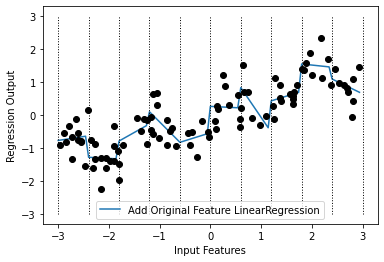

In [12]:
reg = LinearRegression().fit(X_product, y)

line_product = np.hstack([line_binned, line * line_binned]) # 예측해야 할 데이터도 훈련한 데이터와 같이 상호작용을 구함
plt.plot(line, reg.predict(line_product), label='Add Original Feature LinearRegression')

for bin in bins:
    plt.plot([bin, bin], [-3, 3], ':', c='k', linewidth=1) # x축은 각 구간(bin, bin), y축은 -3부터 3까지 표현

plt.legend(loc='best')
plt.ylabel('Regression Output')
plt.xlabel('Input Features')
plt.plot(X[:, 0], y, 'o', c='k')
plt.show()

## 다항식 추가
**원본 특성에 다항식을 추가** $x$가 있다면 $x^2$, $x^3$ 항을 추가적으로 생성, $y$라는 특성이 있다면 $x * y$ 같은 특성도 추가

In [13]:
# PolynomialFeatures: 다항식 추가 클래스
from sklearn.preprocessing import PolynomialFeatures

'''
  degree: 차수(특성에 몇 제곱까지 할 것인가)
  include_bias: 특정한 평항을 추가할지 말지 여부. (+1) True로 놓게 되면 치수10 + 편향1 = 총 11개의 특성이 생성된다
'''
poly = PolynomialFeatures(degree=10, include_bias=False)
poly.fit(X)

X_poly = poly.transform(X)

In [14]:
X_poly.shape

(100, 10)

In [15]:
print("X 원소: \n{}".format(X[:3]))
print("X_poly 원소: \n{}".format(X_poly[:3]))

X 원소: 
[[-0.75275929]
 [ 2.70428584]
 [ 1.39196365]]
X_poly 원소: 
[[-7.52759287e-01  5.66646544e-01 -4.26548448e-01  3.21088306e-01
  -2.41702204e-01  1.81943579e-01 -1.36959719e-01  1.03097700e-01
  -7.76077513e-02  5.84199555e-02]
 [ 2.70428584e+00  7.31316190e+00  1.97768801e+01  5.34823369e+01
   1.44631526e+02  3.91124988e+02  1.05771377e+03  2.86036036e+03
   7.73523202e+03  2.09182784e+04]
 [ 1.39196365e+00  1.93756281e+00  2.69701700e+00  3.75414962e+00
   5.22563982e+00  7.27390068e+00  1.01250053e+01  1.40936394e+01
   1.96178338e+01  2.73073115e+01]]


In [16]:
print('항 이름:\n{}'.format(poly.get_feature_names()))

항 이름:
['x0', 'x0^2', 'x0^3', 'x0^4', 'x0^5', 'x0^6', 'x0^7', 'x0^8', 'x0^9', 'x0^10']


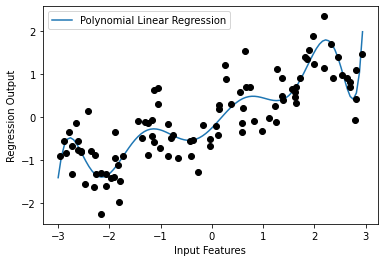

In [18]:
reg = LinearRegression().fit(X_poly, y)

line_poly = poly.transform(line)

plt.plot(line, reg.predict(line_poly), label='Polynomial Linear Regression')
plt.plot(X[:, 0], y, 'o', c='k')
plt.ylabel('Regression Output')
plt.xlabel('Input Features')
plt.legend(loc='best')
plt.show()